In [117]:
#---------- preparação -----------------# 

import pandas as pd
import seaborn as srn
import statistics as sts

In [78]:
#importando os dados
dataset = pd.read_csv('Churn.csv')
dataset.head()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [79]:
#1 dando nome as colunas
dataset.columns = ['Id', 'Score', 'Estado', 'Genero', 'Idade', 'Patrimonio', 'Saldo', 'Produtos', 'TemCartCredito', 'Ativo', 'Salario', 'Saiu']

In [80]:
#visualizar
dataset.head()

#---------- preparação -----------------# 

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [81]:
#---------- análise exploratória -----------------# 

#explorar dados categoricos

#por estado
agrupado = dataset.groupby(['Estado']).size()
agrupado

Estado
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

<Axes: xlabel='Estado'>

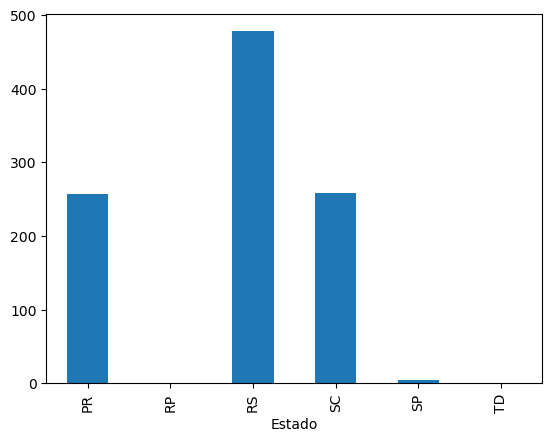

In [82]:
#gerando um grafico de barras
agrupado.plot.bar()

In [83]:
#genero
agrupado = dataset.groupby(['Genero']).size()
agrupado

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

<Axes: xlabel='Genero'>

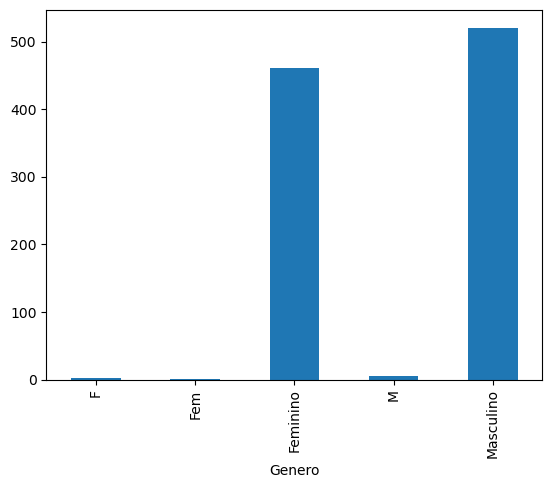

In [84]:
agrupado.plot.bar()

In [85]:
#explorar colunas numericas

#score
dataset['Score'].describe()

count    999.000000
mean     648.621622
std       98.264219
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: Score, dtype: float64

<Axes: >

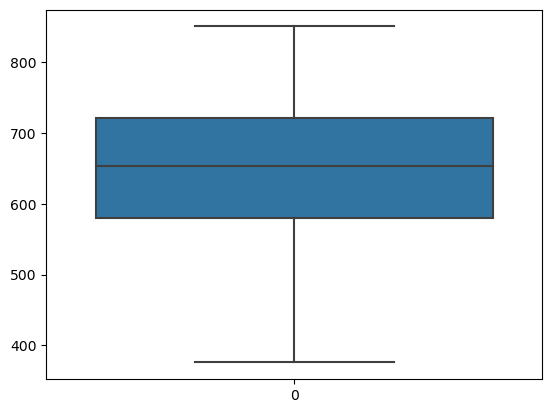

In [86]:
#criando uma visualização
srn.boxplot(dataset['Score'])

<Axes: xlabel='Score', ylabel='Count'>

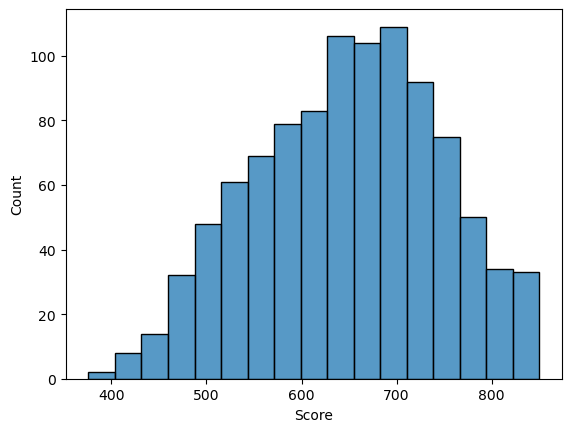

In [87]:
#histograma
srn.histplot(dataset['Score'])

#Não há nenhum problema evidente devido a disposição organiga dos dados.

In [88]:
#idade - com valor negativo
dataset['Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

<Axes: >

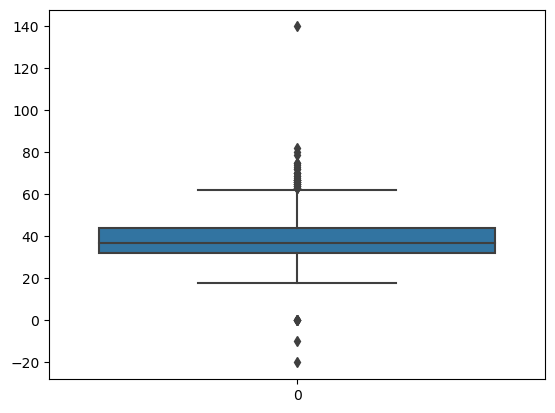

In [89]:
srn.boxplot(dataset['Idade'])

<Axes: xlabel='Idade', ylabel='Count'>

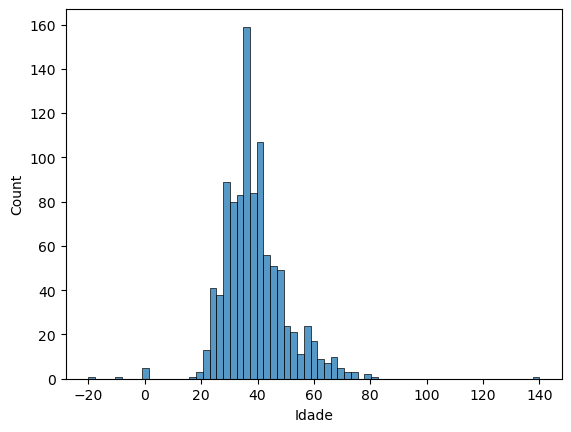

In [90]:
srn.histplot(dataset['Idade'])

#Há algumas inconsistencias com relação a idade, sendo valores negativos e zerados
#e também valores muito altos, como por exemplo 140

In [91]:
#saldo
dataset['Saldo'].describe()

count    9.990000e+02
mean     7.164928e+06
std      6.311840e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.958835e+06
75%      1.258684e+07
max      2.117743e+07
Name: Saldo, dtype: float64

<Axes: >

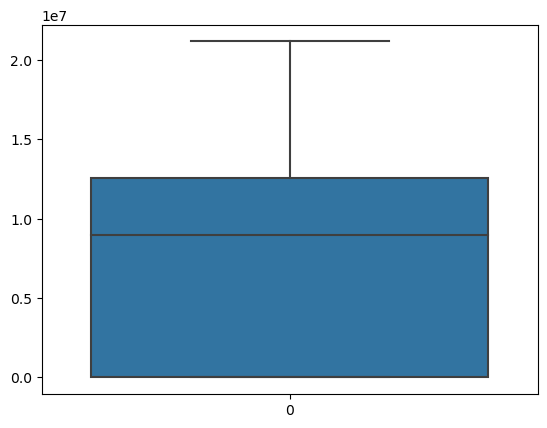

In [92]:
srn.boxplot(dataset['Saldo'])

<Axes: xlabel='Saldo', ylabel='Count'>

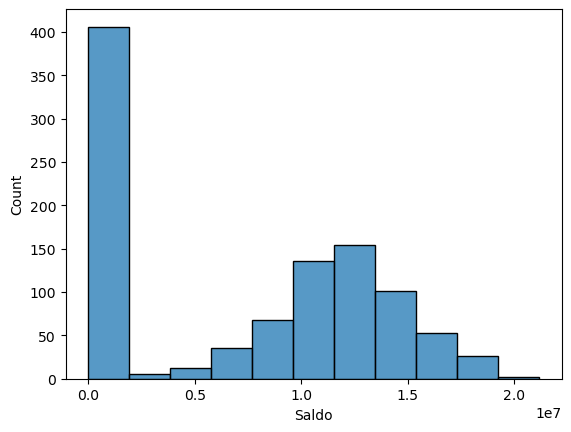

In [93]:
srn.histplot(dataset['Saldo'])

#Pode haver problemas com modelos posteriormente, porém muitos cliente podem sim
#ter um saldo de fato zerado.

In [94]:
#salário
dataset['Salario'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

<Axes: >

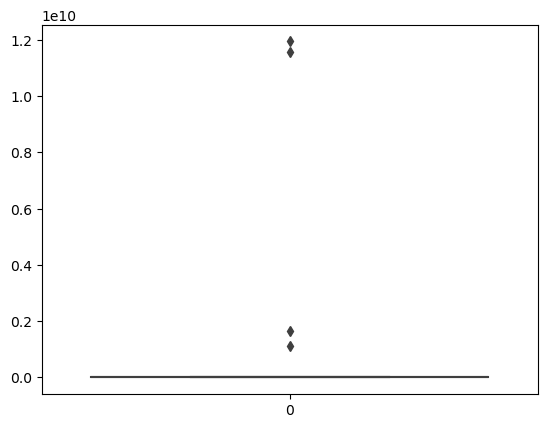

In [95]:
srn.boxplot(dataset['Salario'])

<Axes: xlabel='Salario', ylabel='Count'>

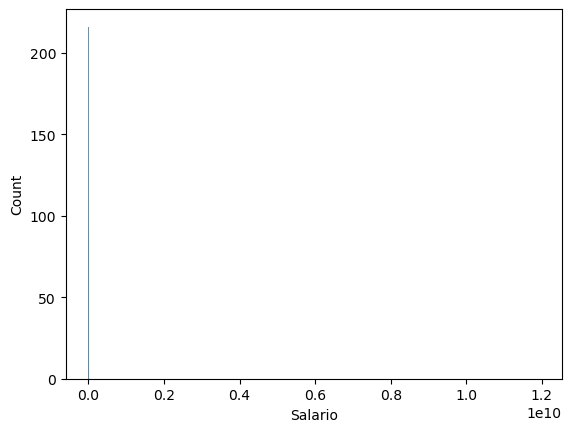

In [96]:
srn.histplot(dataset['Salario'])

#Um problema evidente na coluna de salários, onde há uma distorção grande
#com relação aos valores 0, impossibilitando a visualização dos demais valores.

In [97]:
#contanto valores NaN
#genero e salario
dataset.isnull().sum()

#Há valores NaN em dados categoricos e numericos.

Id                0
Score             0
Estado            0
Genero            8
Idade             0
Patrimonio        0
Saldo             0
Produtos          0
TemCartCredito    0
Ativo             0
Salario           7
Saiu              0
dtype: int64

In [98]:
#------------ tratamento de dados ---------------#

#definindo a mediana da coluna Salario
mediana = sts.median(dataset['Salario'])
mediana

70518.0

In [99]:
#substituindo NaN pela mediana
dataset['Salario'].fillna(mediana, inplace=True)

In [100]:
#verificando os NaN
dataset['Salario'].isnull().sum()

0

In [101]:
#genero
agrupado = dataset.groupby(['Genero']).size()
agrupado

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

In [102]:
#total de NaN
dataset['Genero'].isnull().sum()

8

In [103]:
#preenchendo os NaN com Masculino (moda)
dataset['Genero'].fillna('Masculino', inplace=True)

In [104]:
#verificando os NaN
dataset['Genero'].isnull().sum()

0

In [105]:
#padronizando
dataset.loc[dataset['Genero'] == 'M', 'Genero'] = 'Masculino'
dataset.loc[dataset['Genero'].isin(['Fem', 'F']), 'Genero'] = 'Feminino'

#visualizando o resultado
agrupado = dataset.groupby(['Genero']).size()
agrupado

Genero
Feminino     464
Masculino    535
dtype: int64

In [106]:
#idadeis fora do dominio
dataset['Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

In [107]:
#visualizar o problema
dataset.loc[(dataset['Idade'] < 0) | (dataset['Idade'] > 120)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
867,869,636,RS,Feminino,-10,1,17083346,1,1,0,11051028.0,1
984,986,773,RS,Masculino,-20,1,12453278,2,0,1,1172357.0,0
990,992,655,RS,Masculino,140,5,93147,2,1,0,6621413.0,0


In [108]:
#calcular a mediana
mediana = sts.median(dataset['Idade'])
mediana

37

In [109]:
#substituindo
dataset.loc[(dataset['Idade'] < 0) | (dataset['Idade'] > 120), 'Idade'] = mediana

In [110]:
#verificando se houve alteração
dataset.loc[(dataset['Idade'] < 0) | (dataset['Idade'] > 120)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [111]:
#buscando dados duplicados
dataset[dataset.duplicated(['Id'], keep=False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
80,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
81,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0


In [113]:
#excluindo pelo ID
dataset.drop_duplicates(subset='Id', keep='first', inplace=True)
#visualizando
dataset[dataset.duplicated(['Id'], keep=False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [114]:
#estado fora do dominio
agrupado = dataset.groupby(['Estado']).size()
agrupado

Estado
PR    257
RP      1
RS    477
SC    258
SP      4
TD      1
dtype: int64

In [116]:
#atribuindo RS (moda)
dataset.loc[dataset['Estado'].isin(['RP', 'SP', 'TD']), 'Estado'] = 'RS'
agrupado = dataset.groupby(['Estado']).size()
agrupado

Estado
PR    257
RS    483
SC    258
dtype: int64

In [118]:
#outliers em salario, considerando 2 desvios padrão
desv = sts.stdev(dataset['Salario'])
desv

528988918.4679201

In [119]:
#definindo padrao como maior que 2 desvios padrão
dataset.loc[dataset['Salario'] >= 2 * desv]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
7,8,376,PR,Feminino,29,4,11504674,4,1,0,1.193469e+10,1
116,118,668,PR,Feminino,37,6,1678644,1,1,0,1.156383e+10,0
170,172,484,RS,Feminino,29,4,13011439,1,1,0,1.640179e+09,0
230,232,673,RS,Masculino,72,1,0,2,0,1,1.119812e+09,0


In [121]:
#atualizando os salarios para a mediana
mediana = sts.median(dataset['Salario'])
mediana

8637195.5

In [122]:
#atribuindo
dataset.loc[dataset['Salario'] >= 2 * desv, 'Salario'] = mediana

#efetuando a checagem
dataset.loc[dataset['Salario'] >= 2 * desv]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [127]:
dataset.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [125]:
dataset.shape

(998, 12)